### Modelo probabilistico.

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)

In [6]:
df = df.loc[:,['date','Ecuador']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

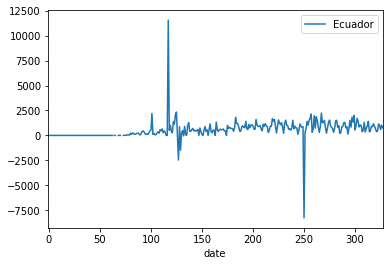

In [7]:
df.plot(x ='date', y='Ecuador')

### Implementacion de modelo probabilistico

In [9]:
filtro = df["Ecuador"][61:]
media = filtro.mean()
mediana = filtro.median()

url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']]
y = list(df_t.iloc [:, 1])
x = list(df_t.iloc [:, 0])
prediccion_siguiente = int(y[-1] + mediana)

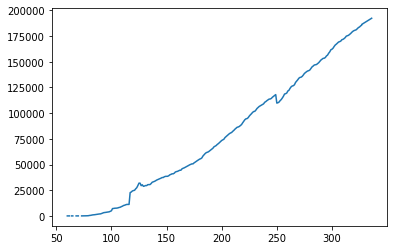

In [10]:
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

### Practica
Comparar el modelo de predicción matemático contra el modelo de probabilidad.

### Modelo matematico.

           4           3         2
3.432e-05 x - 0.02121 x + 5.631 x + 71.88 x - 2535


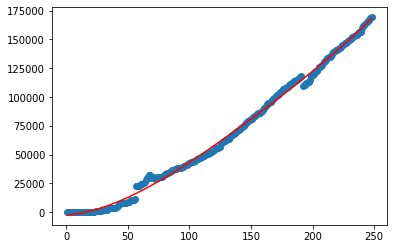

In [11]:
%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

df = pd.read_csv('covid.csv').fillna(0)
ndf= df.loc[(df[' Country'] == 'Ecuador') & (df[' Cumulative_cases'] != 0)]
ndf1=ndf[['Date_reported',' Cumulative_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')

crx=x
cry=y

fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
y_pred=fun1(x)
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')  
plt.show()

### Modelo probabilistico.

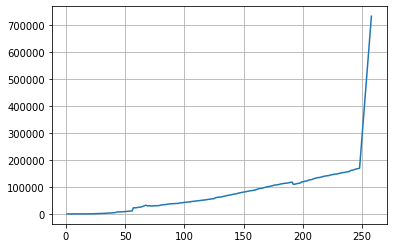

In [12]:
media = ndf1.values[:,1].mean()
mediana = np.median(ndf1.values[:,1])

for it in range(int(x[-1]), int(x[-1]+10)):
    x=np.append(x,(it+1))
    y=np.append(y,y[-1] + mediana)
plt.plot(x,y)
plt.grid(True)
plt.show()

### Comparacion modelos.

In [13]:
y_pred=np.array([])
y_pred=fun1(x)

from tabulate import tabulate
table=[]
print(tabulate(table))
for i,j,k in zip(x,y,y_pred):
    table.append([i,j,round(k,2)])
print(tabulate(table, headers=["Dia","M.Probabilistico","M.Matematico"]))


  Dia    M.Probabilistico    M.Matematico
-----  ------------------  --------------
    1                   5        -2457.11
    2                   5        -2368.48
    3                  10        -2268.85
    4                  11        -2158.33
    5                  11        -2037.05
    6                  17        -1905.13
    7                  17        -1762.7
    8                  18        -1609.88
    9                  18        -1446.79
   10                  19        -1273.55
   11                  19        -1090.28
   12                  19         -897.09
   13                  21         -694.12
   14                  27         -481.46
   15                  27         -259.24
   16                  27          -27.58
   17                  41          213.41
   18                  62          463.62
   19                 159          722.94
   20                 199          991.25
   21                 367         1268.44
   22                 506         

Retroceder un semana y comparar el modelo matemático vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

In [14]:
y_pred=np.array([])
y_pred=fun1(x)

from tabulate import tabulate
table=[]
print(tabulate(table))
for i,j,k in zip(x,y,y_pred):
    table.append([i,j,j,round(k,2)])
print(tabulate(table, headers=["Dia","Reales","M.Probabilistico","M.Matematico"]))


  Dia    Reales    M.Probabilistico    M.Matematico
-----  --------  ------------------  --------------
    1         5                   5        -2457.11
    2         5                   5        -2368.48
    3        10                  10        -2268.85
    4        11                  11        -2158.33
    5        11                  11        -2037.05
    6        17                  17        -1905.13
    7        17                  17        -1762.7
    8        18                  18        -1609.88
    9        18                  18        -1446.79
   10        19                  19        -1273.55
   11        19                  19        -1090.28
   12        19                  19         -897.09
   13        21                  21         -694.12
   14        27                  27         -481.46
   15        27                  27         -259.24
   16        27                  27          -27.58
   17        41                  41          213.41
   18       

### Analisis
Por los resultados obtenidos se puede determinar que el modelo probabilistico tiene un error mayor al modelo matematico ya que no se acopla al mundo real.